In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_row",111)
pd.set_option("display.max_column",111)

In [230]:
#titanic = pd.read_csv("Titanic-Dataset.csv")
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
 titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [232]:
#titanic.dropna(axis=1)

# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

## Checklist de base
#### Analyse de Forme :
- **variable target** : Survived
- **lignes et colonnes** : 891, 12
- **types de variables** : qualitatives : 5, quantitatives : 7 
- **Analyse des valeurs manquantes** :
    - peu de NaN (2 variables > 20% de NaN)

#### Analyse de Fond :
- **Visualisation de la target** :
    - 64% de survivant 
    - 36% de non survivant
    
    
    
- **Signification des variables** :
    -  variables continues skewed (asymétriques)
    - variable qualitative : binaire (0, 1)



- **Relation Variables / Target** :
    - Survie / Sex : Il y a plus d'homme mort que de femme (par ailleur il y a eu plus d'homme que de femme a bord du titanic)
    - Survee / pclass : Plusde chance de survie en etant de classe 1
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
    - Survie / Sex : Il y a plus d'homme mort que de femme (par ailleur il y a eu plus d'homme que de femme a bord du titanic)
    - Survee / pclass : Plusde chance de survie en etant de classe 1


- **NaN analyse** : viral : 1350(92/8), blood : 600(87/13), both : 90

### hypotheses nulle (H0): 

- Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents
    - H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs

- Les individus atteints d'une quelconque maladie ont des taux significativement différents


    

In [233]:
df = titanic.copy()

In [234]:
df.shape

(891, 12)

In [235]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [236]:
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

<Axes: >

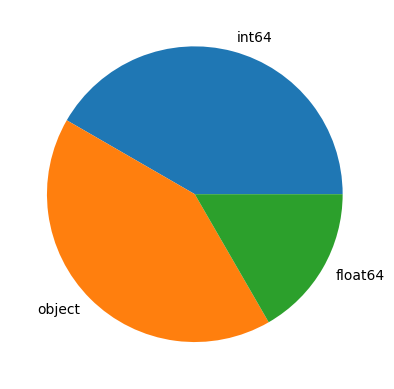

In [237]:
df.dtypes.value_counts().plot.pie()

In [238]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

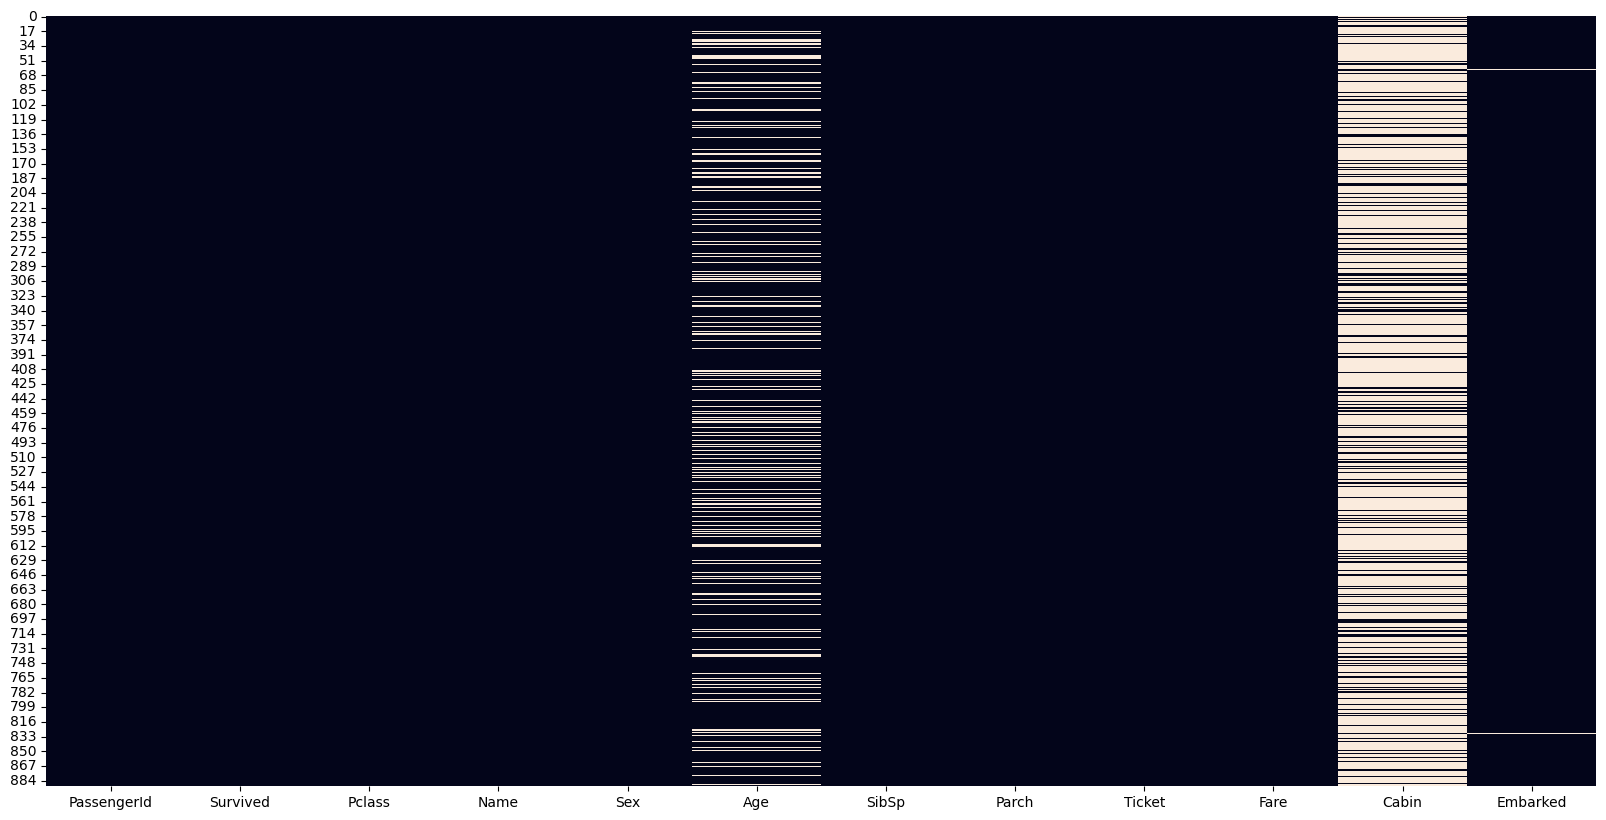

In [239]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [240]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [241]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<Axes: ylabel='Cabin'>

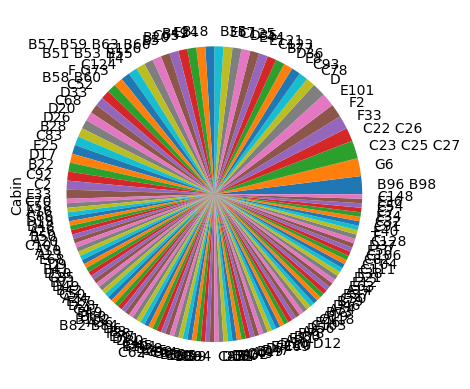

In [242]:
df["Cabin"].value_counts().plot.pie()

In [243]:
df = df[df.columns[df.isna().sum() / df.shape[0]  < 0.7]]

<Axes: >

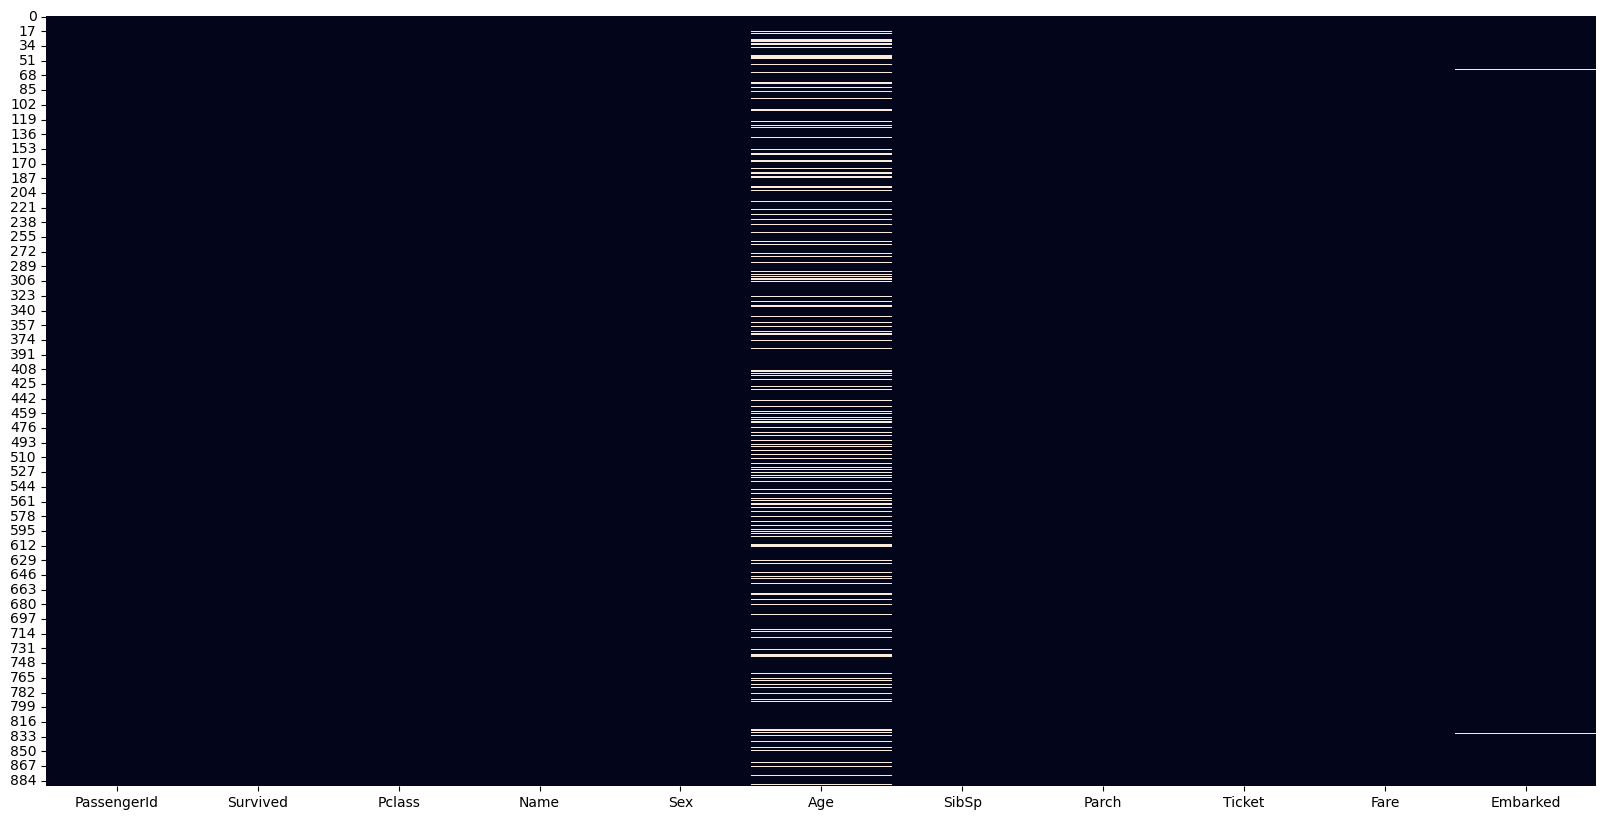

In [244]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [245]:
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [246]:
df["Fare"].count()

891

In [247]:
df["Age"].count()

714

In [248]:
df.shape

(891, 11)

In [249]:
df["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### Histogrames des variables continues

C:\Users\Fitiavana(GhosT)\AppData\Local\Temp\ipykernel_10652\1107122329.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Fitiavana(GhosT)\AppData\Local\Temp\ipykernel_10652\1107122329.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


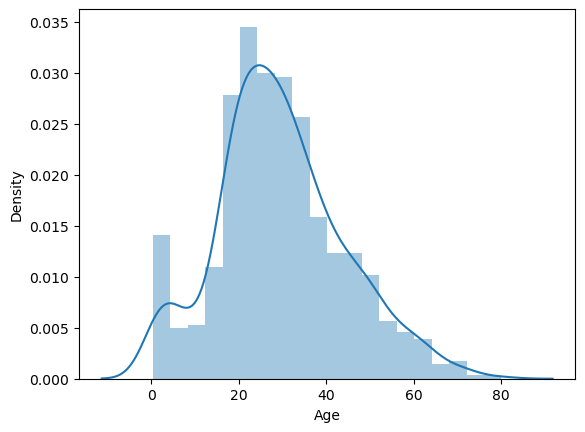

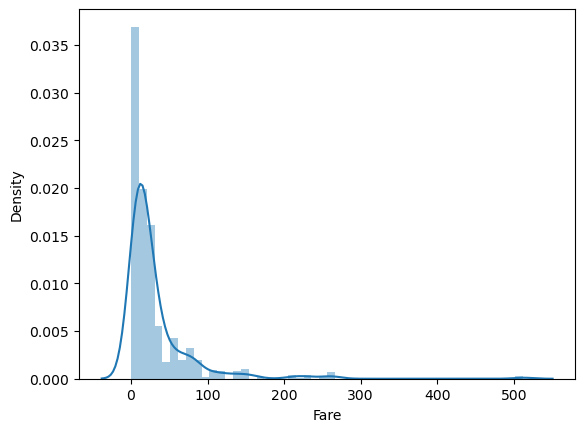

In [250]:
for col in df.select_dtypes("float"):
    plt.figure()
    sns.distplot(df[col])

### Variable discrete

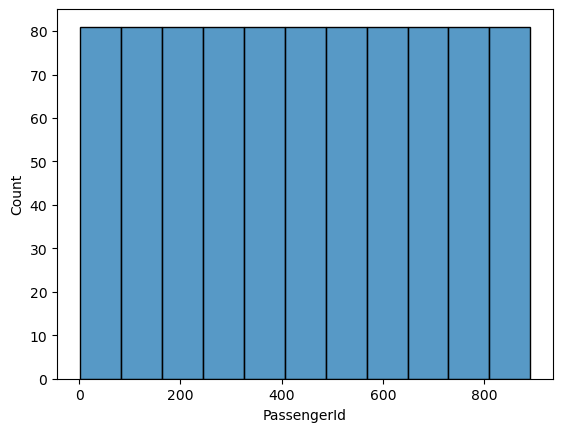

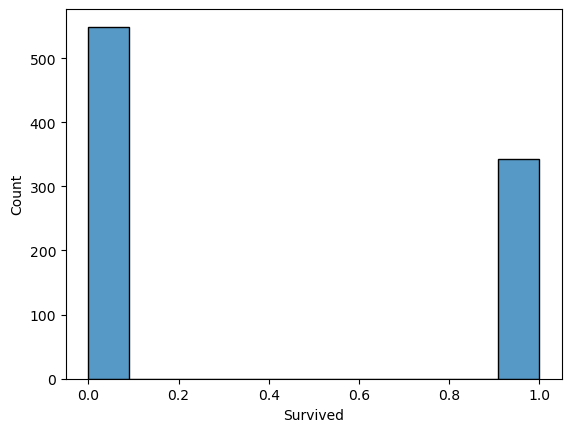

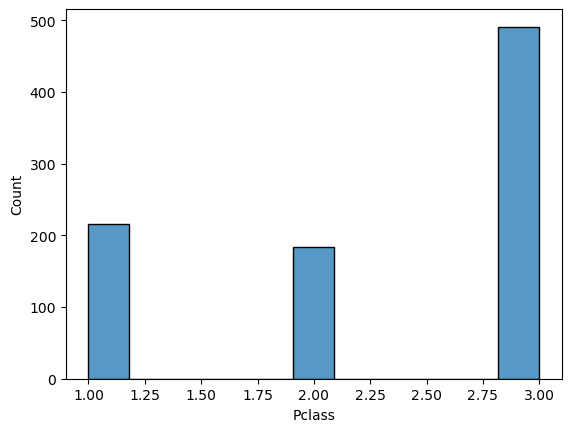

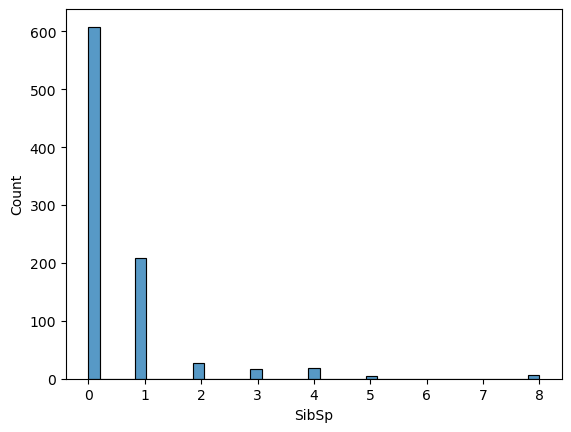

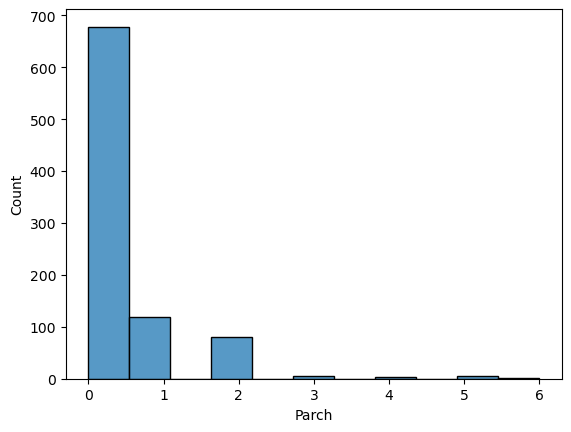

In [251]:
for col in df.select_dtypes("int"):
    plt.figure()
    sns.histplot(df[col])

In [252]:
for col in df.select_dtypes("object"):
    print(f'{col :-<50} :  {df[col].unique()}')

Name---------------------------------------------- :  ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charle

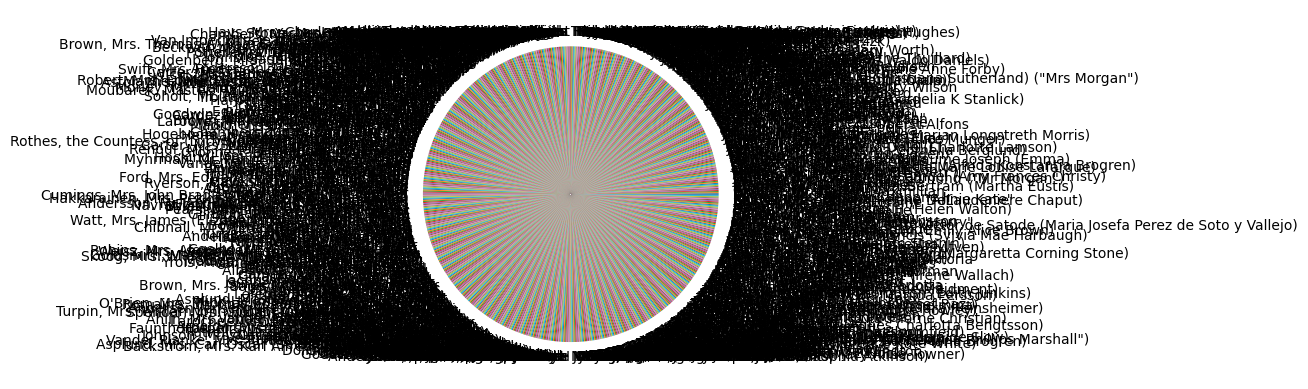

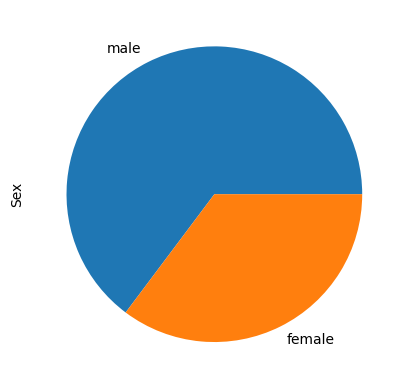

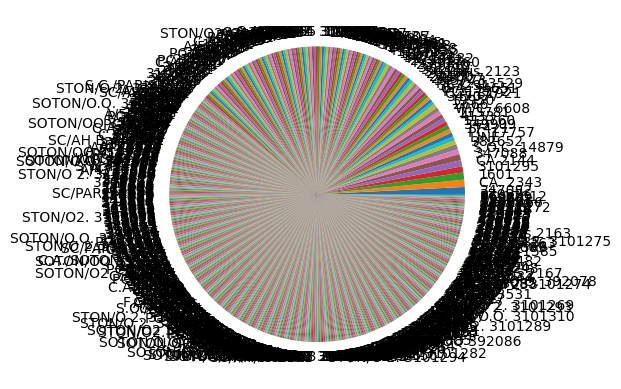

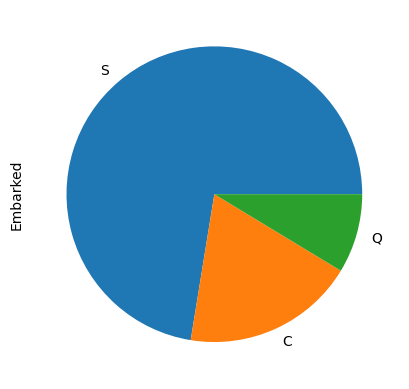

In [253]:
for col in df.select_dtypes("object"):
    plt.figure()
    df[col].value_counts().plot.pie()

## Relation Target / Variables
### Creation sous ensembe : survived 1 et 0

In [254]:
dead_df = df[df["Survived"] == 0]
survived_df = df[df["Survived"] == 1]

## Target / Age

<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\Fitiavana(GhosT)\AppData\Local\Temp\ipykernel_10652\2290009800.py:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if(col is not "Survived"):
C:\Users\Fitiavana(GhosT)\AppData\Local\Temp\ipykernel_10652\2290009800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dead_df[col],label="dead")
C:\Users\Fitiavana(GhosT)\AppData\Local\Temp\ipykernel_10652\2290009800.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

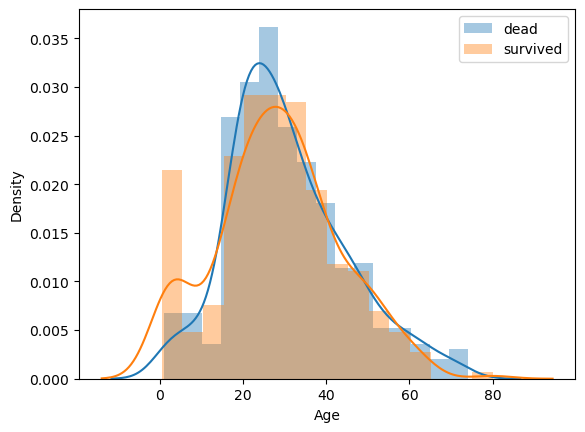

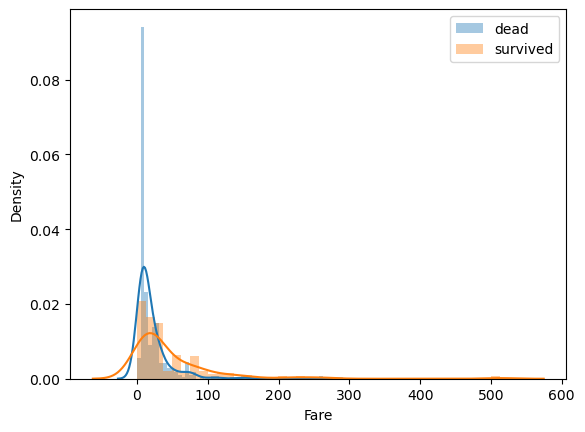

In [255]:
for col in df.select_dtypes("float"):
    if(col is not "Survived"):
        plt.figure()
        sns.distplot(dead_df[col],label="dead")
        sns.distplot(survived_df[col],label="survived")
        plt.legend()

### Relation Target / age

<Axes: xlabel='Age', ylabel='count'>

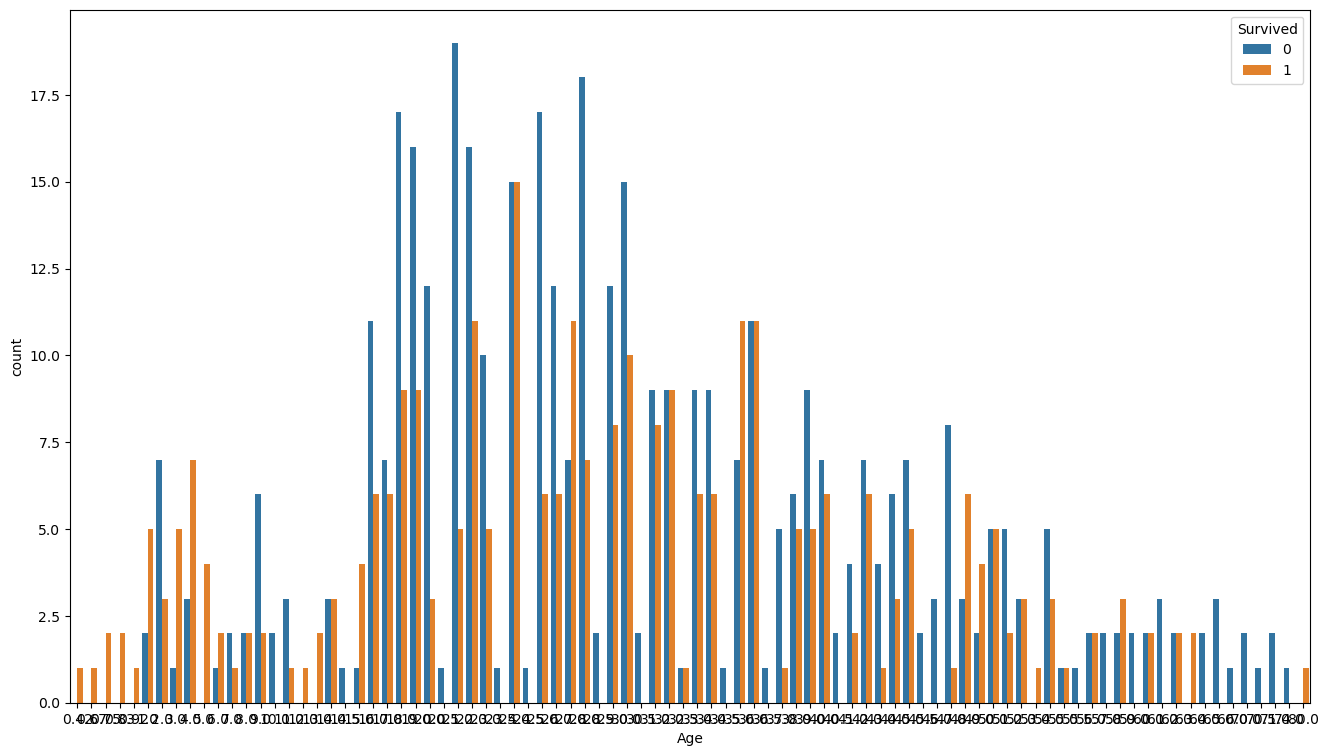

In [256]:
plt.figure(figsize=(16,9))
sns.countplot(x="Age",hue="Survived",data=df)

In [257]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [258]:
import numpy as np

In [259]:
#df['Age'] = df['Age'].fillna(0)
#df['Age'] = df['Age'].apply(lambda x: np.ceil(x) if pd.notnull(x) else x).astype('Int64')

<Axes: xlabel='Age', ylabel='count'>

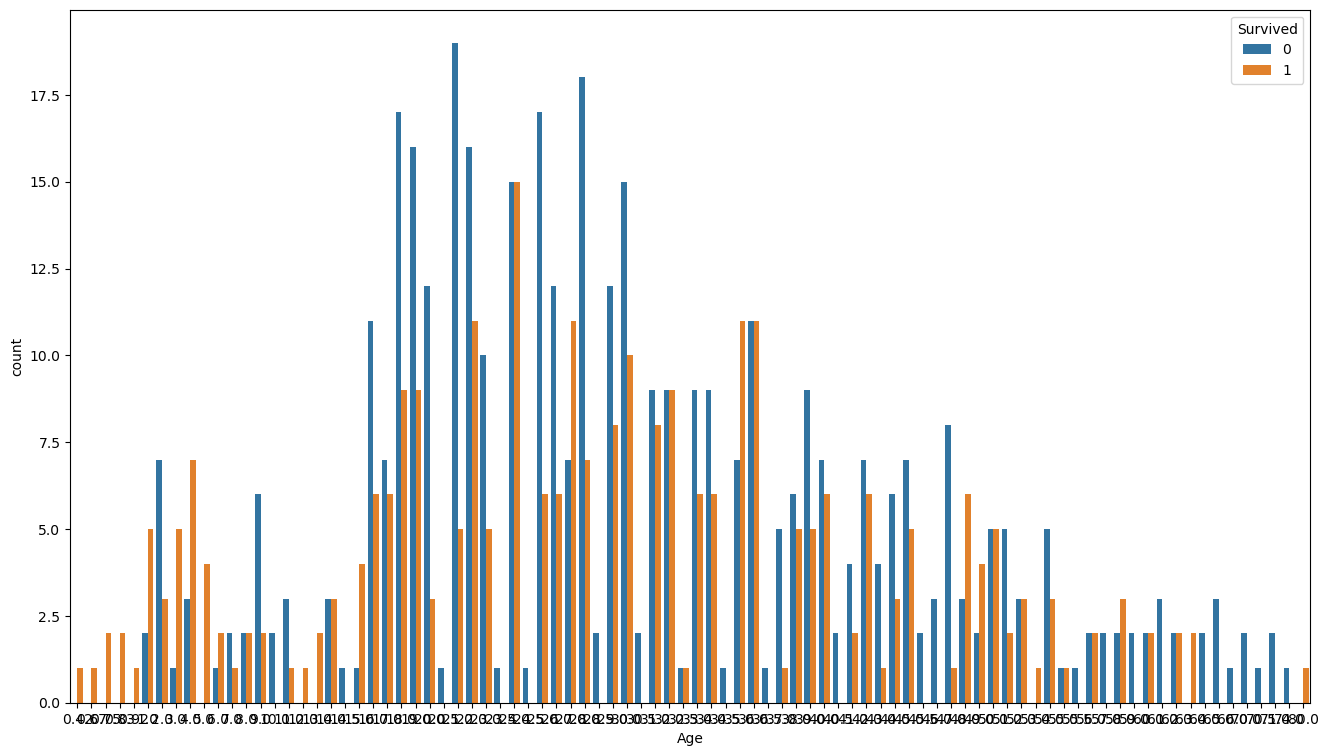

In [260]:
plt.figure(figsize=(16,9))
sns.countplot(x="Age",hue="Survived",data=df)

In [261]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [262]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

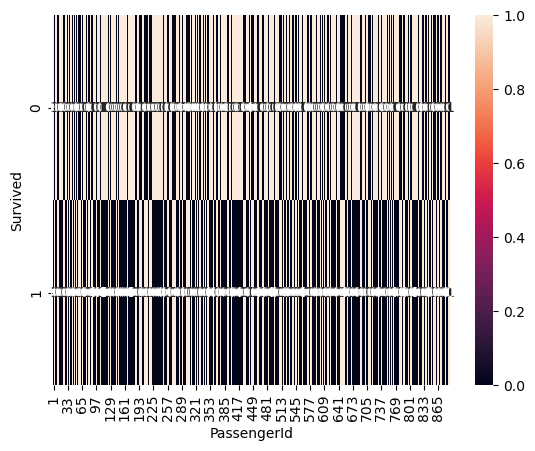

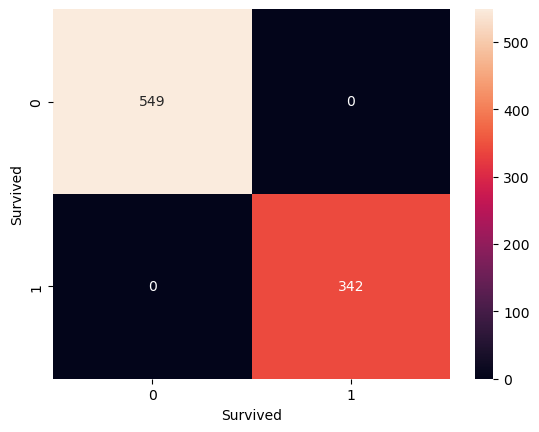

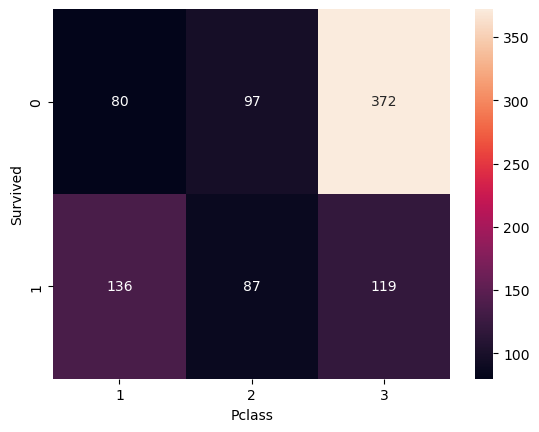

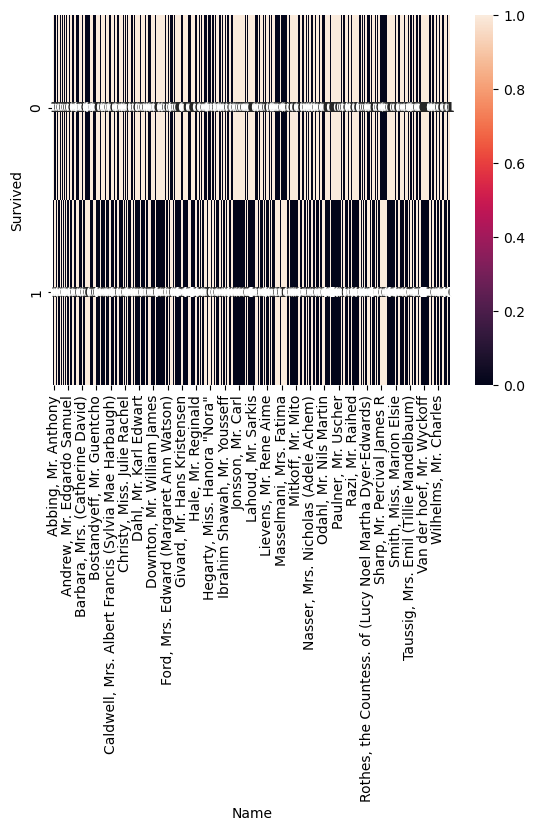

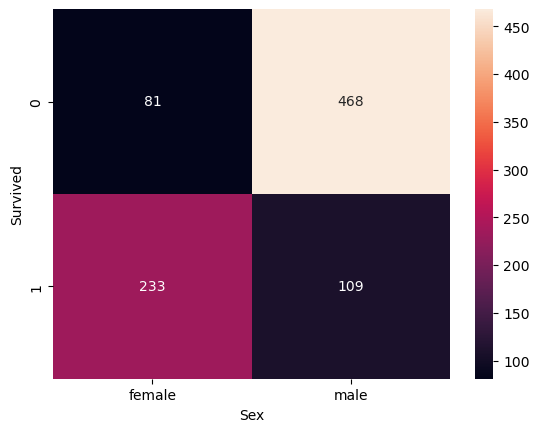

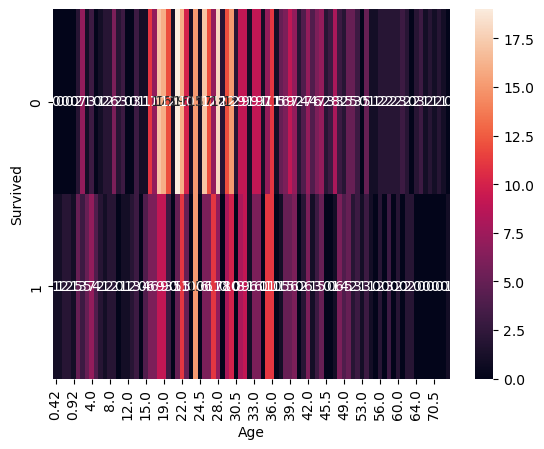

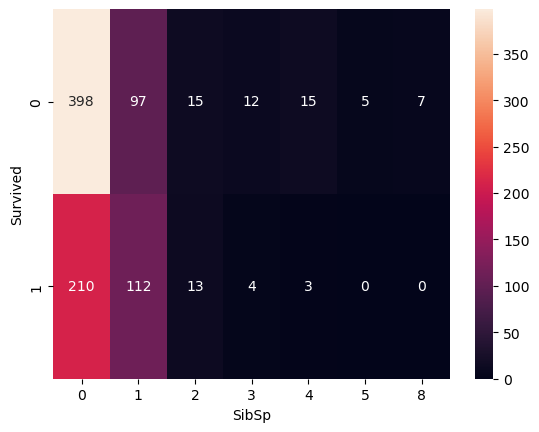

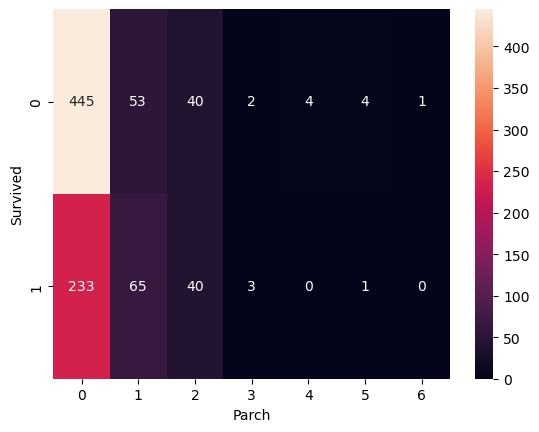

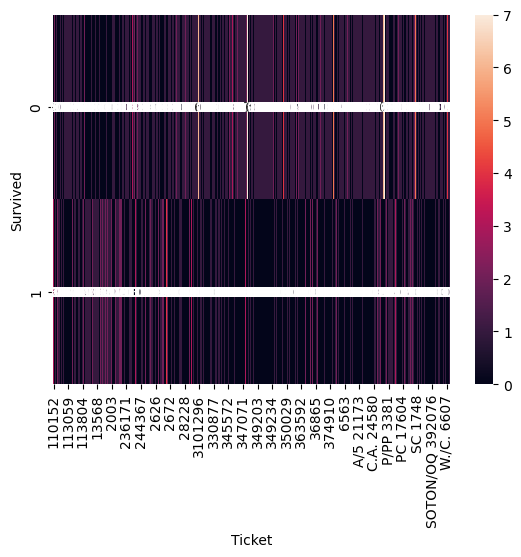

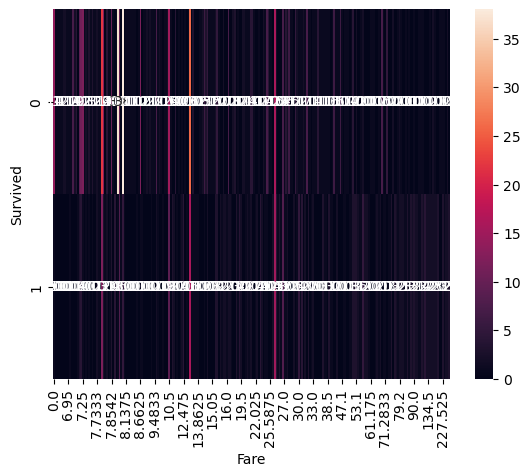

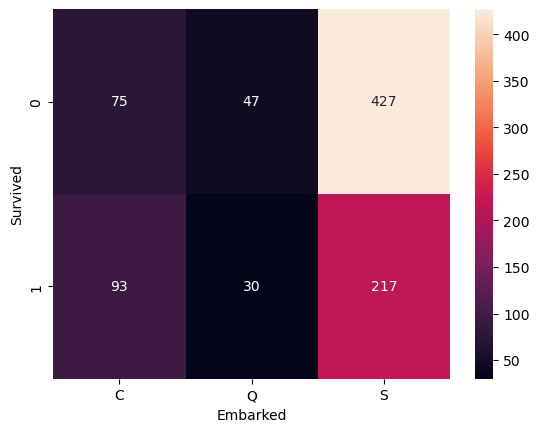

In [263]:
for col in df.columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df["Survived"],df[col]) , annot=True , fmt="d")

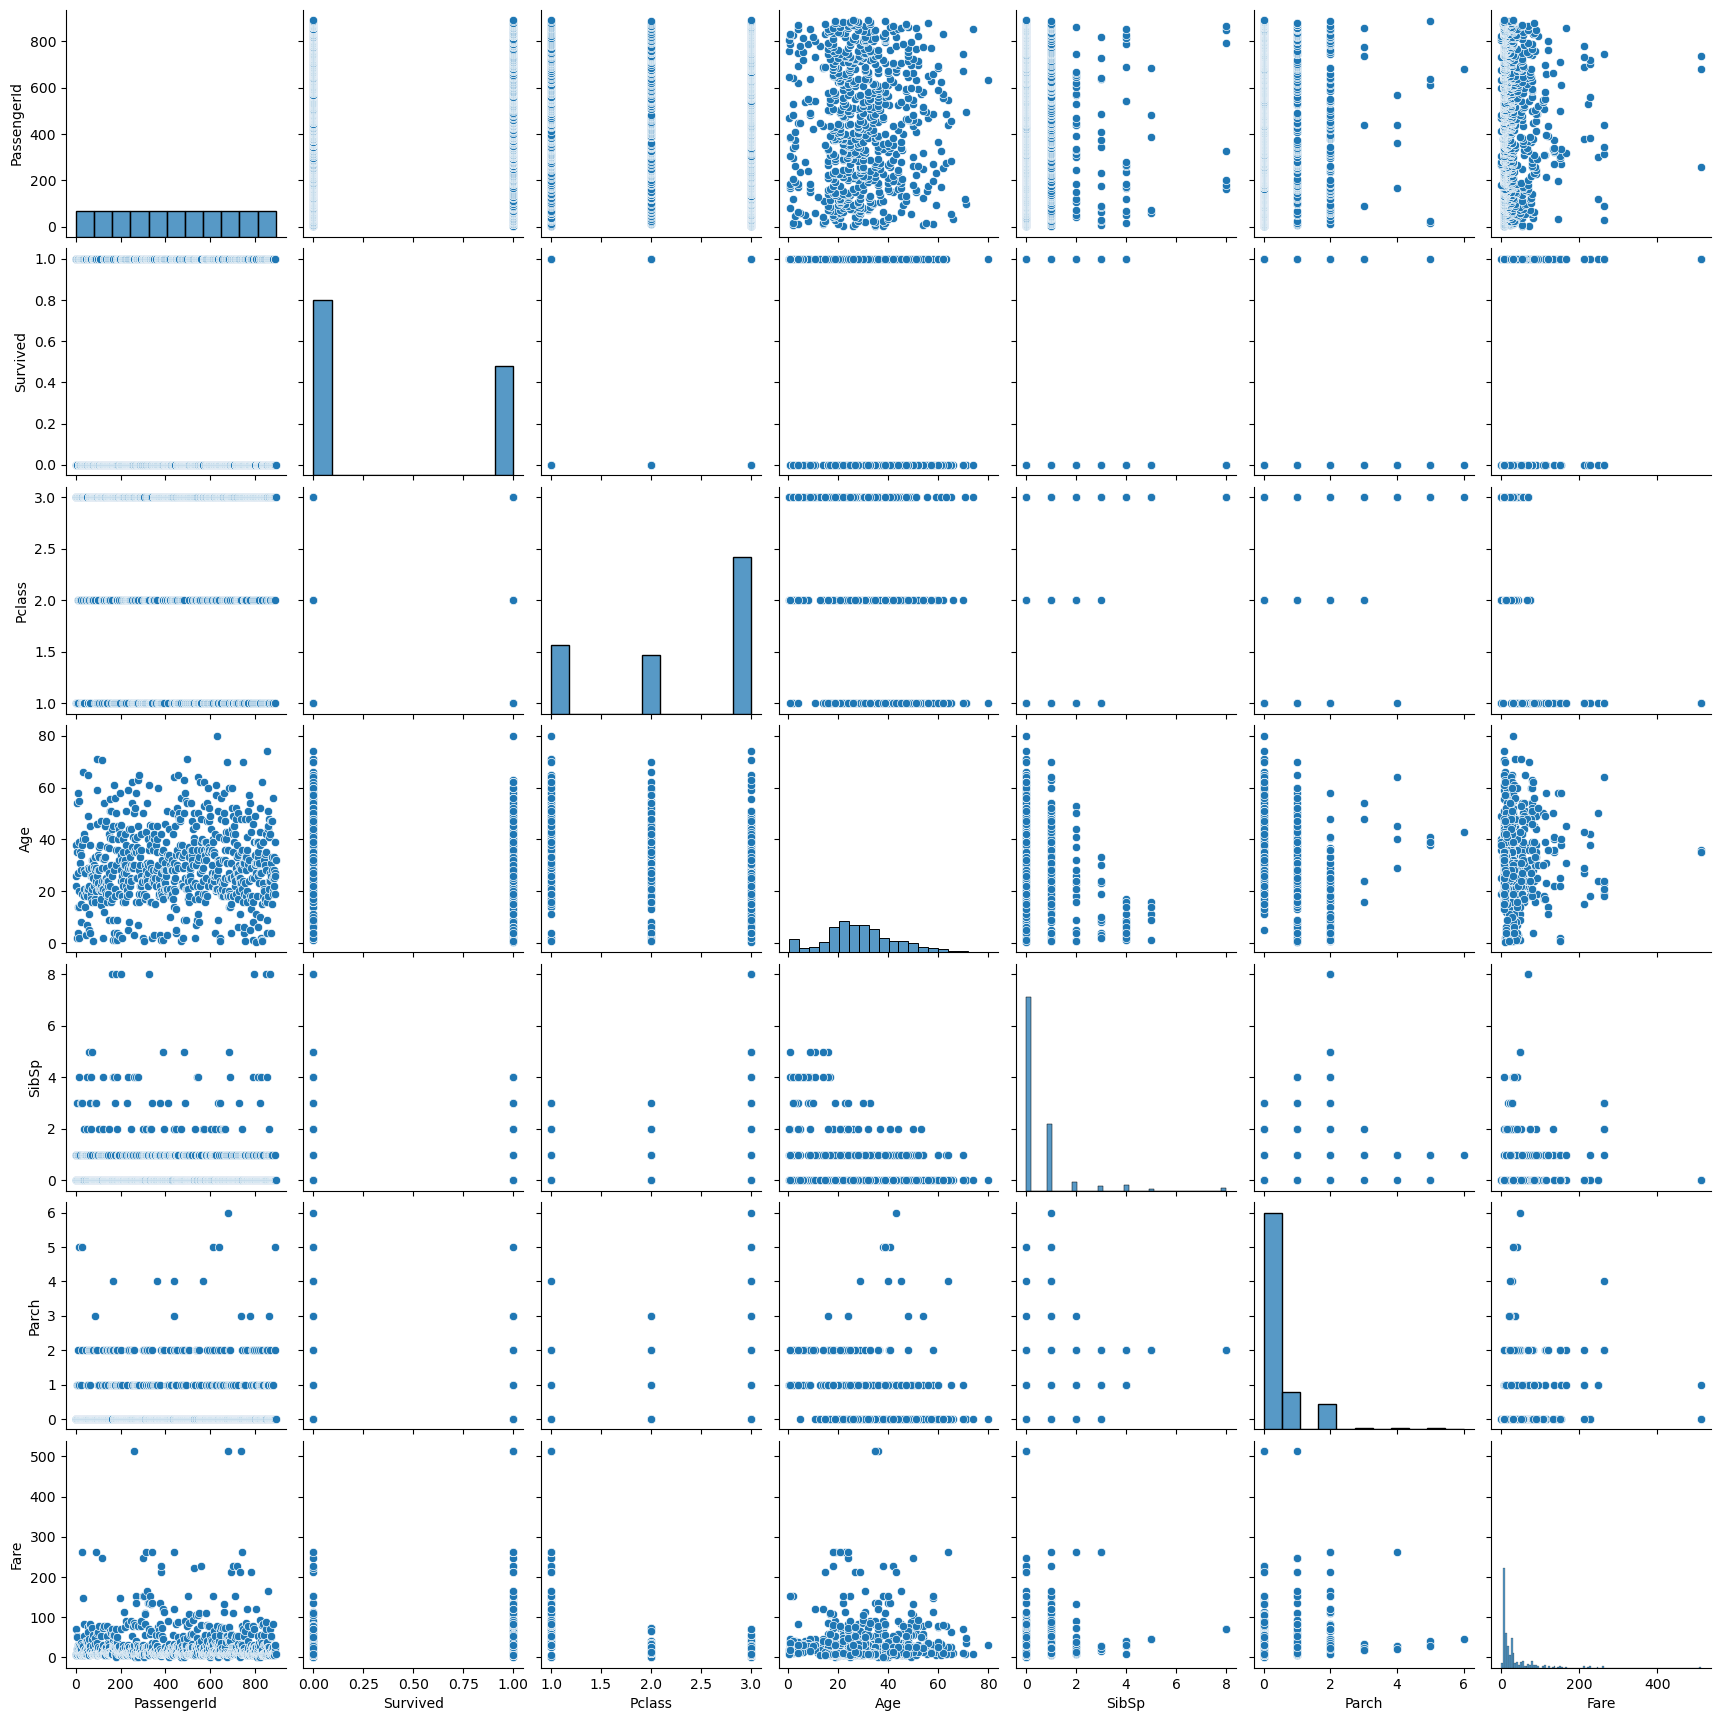

In [264]:
sns.pairplot(df)

C:\Users\Fitiavana(GhosT)\AppData\Local\Temp\ipykernel_10652\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

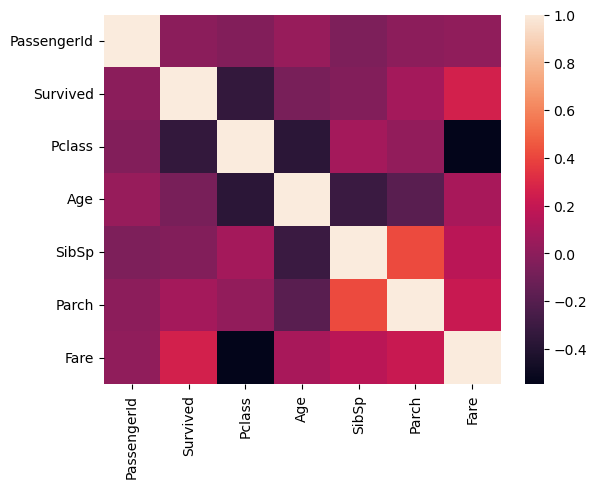

In [265]:
sns.heatmap(df.corr())

In [266]:
df.corr()

C:\Users\Fitiavana(GhosT)\AppData\Local\Temp\ipykernel_10652\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [267]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [269]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(df, df[["Survived","Pclass","Sex"]]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

In [270]:
strat_train_set.shape

(712, 11)

In [271]:
strat_test_set.shape

(179, 11)

In [272]:
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self, X , y=None) :
        return self
    
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] : imputer.fit_transform(X[["Age"]])
        return X

In [273]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator , TransformerMixin):
    def fit(self,X, y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        
        column_names = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        
        column_names = ["Female","Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X
        

In [274]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1 , errors="ignore")

In [275]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),("featureencoder", FeatureEncoder()),("featuredropper",FeatureDropper())])


In [276]:
strat_train_set = pipeline.fit_transform(strat_train_set)

In [277]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
420,421,0,3,NaN,0,0,7.8958,1.0,0.0,0.0,0.0,1.0
584,585,0,3,NaN,0,0,8.7125,1.0,0.0,0.0,0.0,1.0
448,449,1,3,5.0,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
657,658,0,3,32.0,1,1,15.5000,0.0,1.0,0.0,1.0,0.0
777,778,1,3,5.0,0,0,12.4750,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,0,1,71.0,0,0,34.6542,1.0,0.0,0.0,0.0,1.0
615,616,1,2,24.0,1,2,65.0000,0.0,0.0,1.0,1.0,0.0
115,116,0,3,21.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0
692,693,1,3,NaN,0,0,56.4958,0.0,0.0,1.0,0.0,1.0


In [278]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 420 to 353
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          573 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB
